<a href="https://colab.research.google.com/github/RaghavDabra/Heart-Disease/blob/main/Copy_of_predict_heart_disease_using_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Visualization Assignnemt 1 | Predicting Heart disease using logistic regression

This [Data Set](https://www.kaggle.com/ronitf/heart-disease-uci) contains 14 attributes used by Machine Learning researchers to predict the presence of heart disease in a patient. 

In [ ]:
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))
import numpy as np # linear algebra
print("NumPy version: {}". format(np.__version__))
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
print("pandas version: {}". format(pd.__version__))
import matplotlib # collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings # ignore warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Python version: 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
NumPy version: 1.19.5
pandas version: 1.1.5
matplotlib version: 3.2.2


In [ ]:
df = pd.read_csv('heart.csv')
df.shape

(303, 14)

In [ ]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


Columns description:
- age: age in years
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: refers to the presence of heart disease in the patient (1=yes, 0=no)

In [ ]:
df.target.value_counts() # df.target.unique()

1    165
0    138
Name: target, dtype: int64

In [ ]:
disease = len(df[df['target'] == 1])
no_disease = len(df[df['target']== 0])

In [ ]:
Data Visualization

# Data visualization 

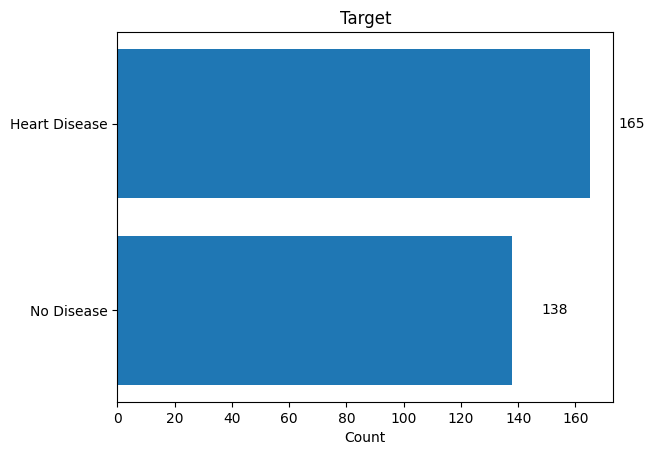

In [ ]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Target')
for i, v in enumerate(x):
    ax.text(v + 10, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

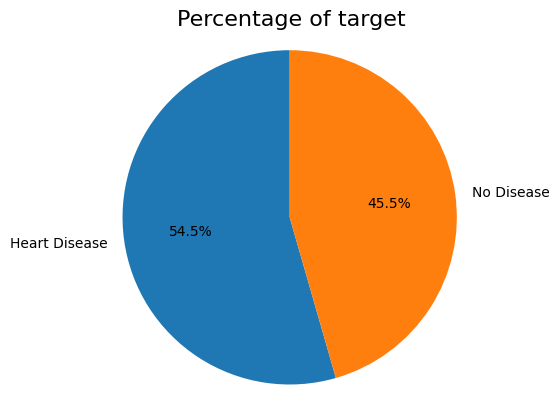

In [ ]:
import matplotlib.pyplot as plt
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
labels = 'Heart Disease', 'No Disease'
sizes = [disease, no_disease]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90) 
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of target', size=16)
plt.show() # Pie chart, where the slices will be ordered and plotted counter-clockwise:

In [ ]:
df.isna().sum() # missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
qualitative = []
quantitative = []
for feature in df.columns:
    if len(df[feature].unique()) <= 8:
        qualitative.append(feature)
    else:
        quantitative.append(feature)

In [ ]:
qualitative

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
quantitative

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

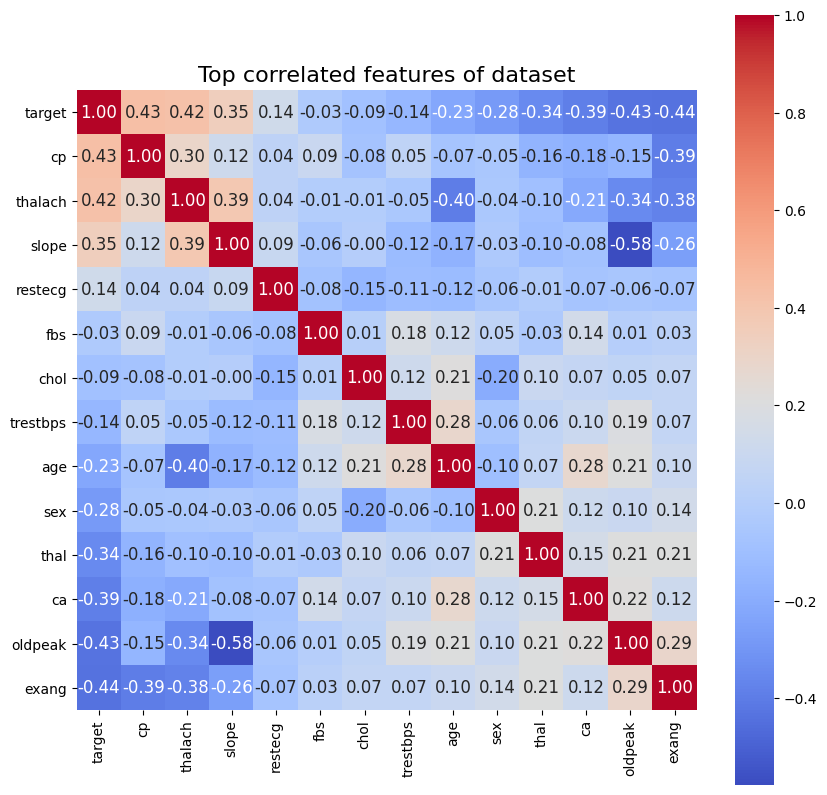

'\ncorrmat = df.corr()\nf, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))\nax.set_title("Correlation Matrix", fontsize=12)\nfilter = df.columns != \'id\'\nsns.heatmap(df[df.columns[filter]].corr(), vmin=-1, vmax=1, cmap=\'coolwarm\', annot=True)\n'

In [ ]:
top = 15
corr = df.corr()
top15 = corr.nlargest(top, 'target')['target'].index
corr_top15 = df[top15].corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_top15, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
plt.title('Top correlated features of dataset', size=16)
plt.show()
"""
corrmat = df.corr()
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
ax.set_title("Correlation Matrix", fontsize=12)
filter = df.columns != 'id'
sns.heatmap(df[df.columns[filter]].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
"""

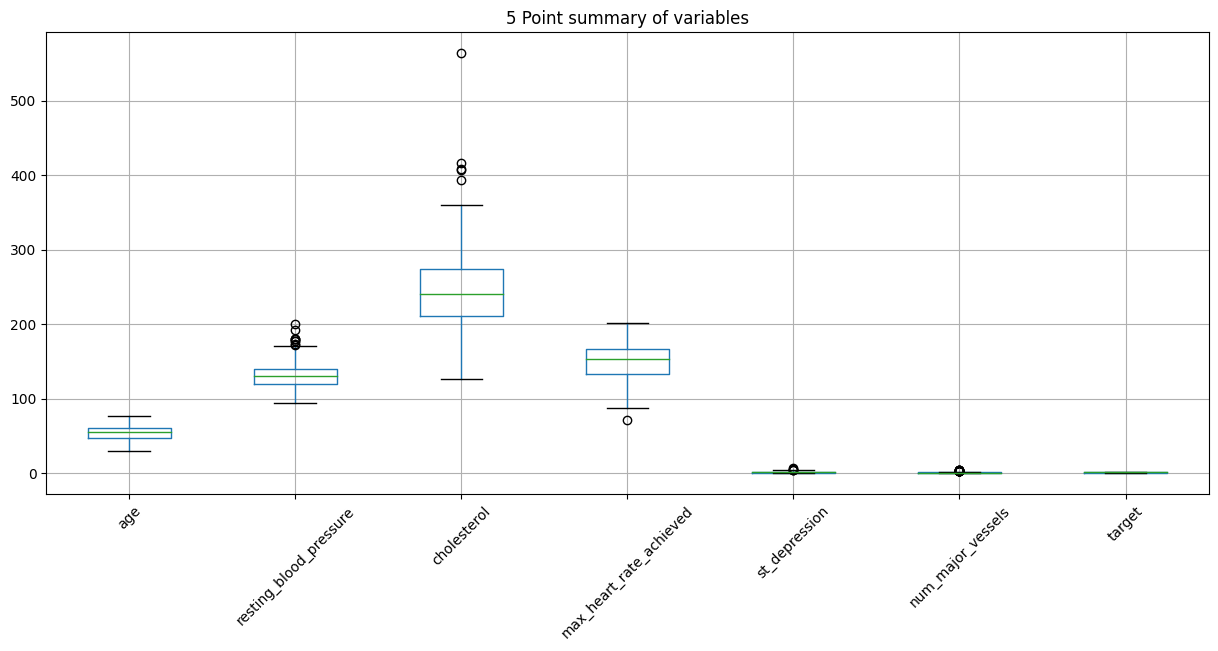

In [ ]:
plt.figure(figsize=(15,6))
plt.title('5 Point summary of variables')
df.boxplot()
plt.xticks(rotation=45)
plt.show()

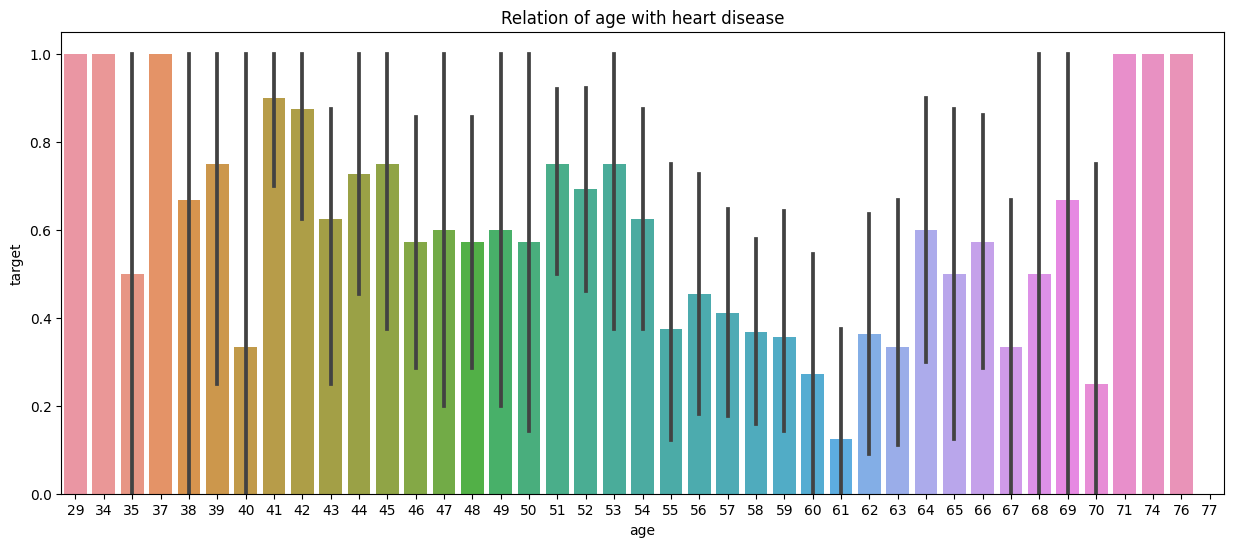

In [ ]:

plt.figure(figsize=(15,6))
plt.title('Relation of age with heart disease')
sns.barplot(x=df['age'],y=df['target'])


In [ ]:
#Correlation Heat Plot
library(corrplot)
corrplot(cor(df[,-c(2,3,6,9,14)]))

SyntaxError: ignored

the variable with the most correlation with target is talach

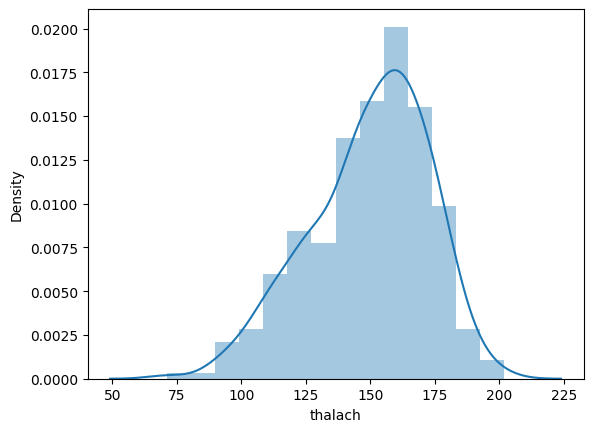

In [ ]:
ax = sns.distplot(df['thalach']) # histogram distribution

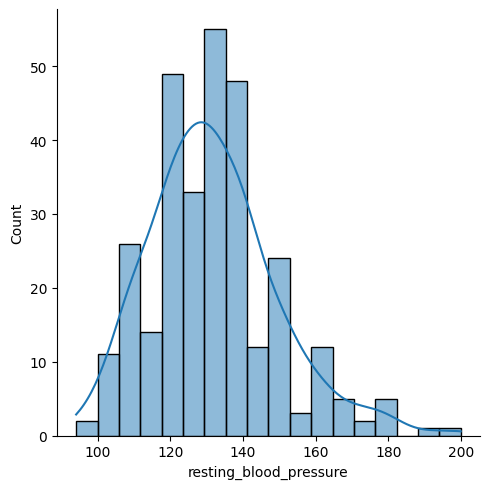

In [ ]:
sns.displot(df['resting_blood_pressure'], kde=True)

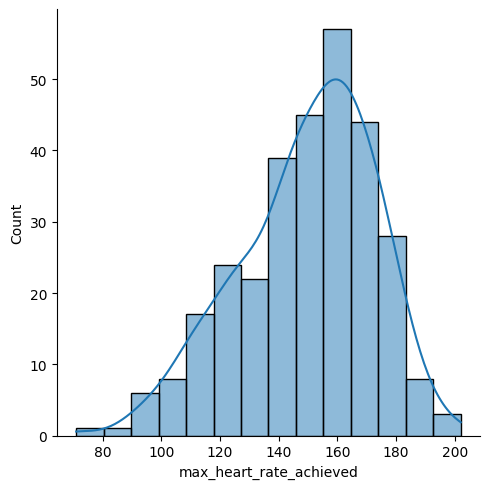

In [ ]:
sns.displot(df['max_heart_rate_achieved'], kde=True)

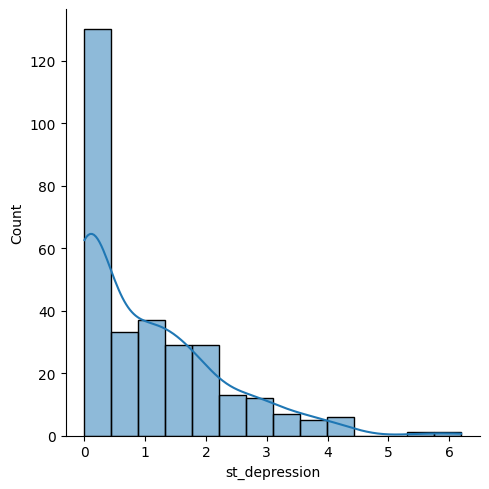

In [ ]:
sns.displot(df['st_depression'], kde=True)

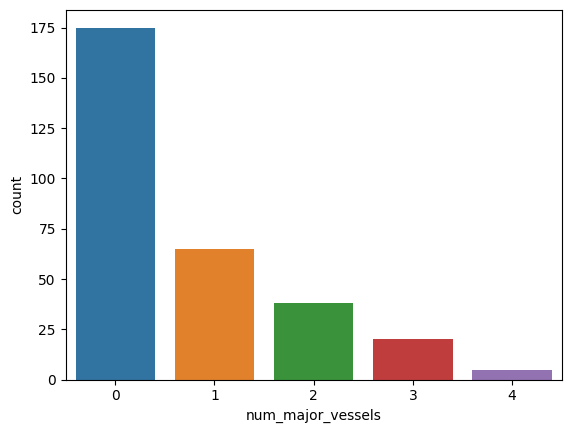

In [ ]:
sns.countplot(x='num_major_vessels', data=df)

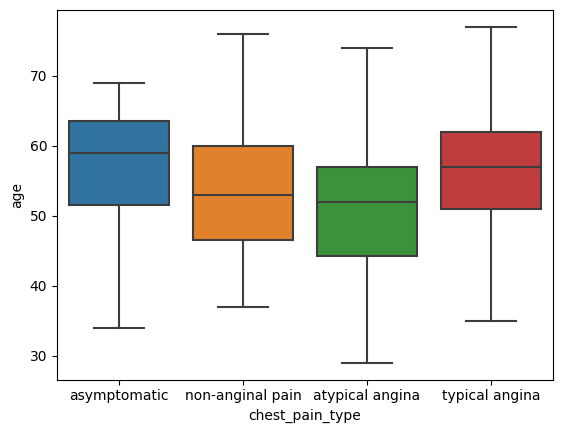

In [ ]:
sns.boxplot(x='chest_pain_type', y='age', data=df)

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [ ]:
df['sex'] = df['sex'].map({0: 'F',
                           1: 'M'})

df['chest_pain_type'] = df['chest_pain_type'].map({0: 'typical angina',
                                                   1: 'atypical angina',
                                                   2: 'non-anginal pain',
                                                   3: 'asymptomatic'})

df['fasting_blood_sugar'] = df['fasting_blood_sugar'].map({0: 'lower than 120mg/ml',
                                                           1: 'greater than 120mg/ml'})

df['rest_ecg'] = df['rest_ecg'].map({0: 'normal',
                                     1: 'ST-T wave abnormality',
                                     2: 'left ventricular hypertrophy'})

df['exercise_induced_angina'] = df['exercise_induced_angina'].map({0: 'no',
                                                                   1: 'yes'})

df['st_slope'] = df['st_slope'].map({0: 'upsloping',
                                     1: 'flat',
                                     2: 'downsloping'})

df['thalassemia'] = df['thalassemia'].map({1: 'normal',
                                           2: 'fixed defect',
                                           3: 'reversable defect'})

In [ ]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,M,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,normal,1
1,37,M,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,1
2,41,F,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,fixed defect,1
3,56,M,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,1
4,57,F,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,1


In [ ]:
df.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

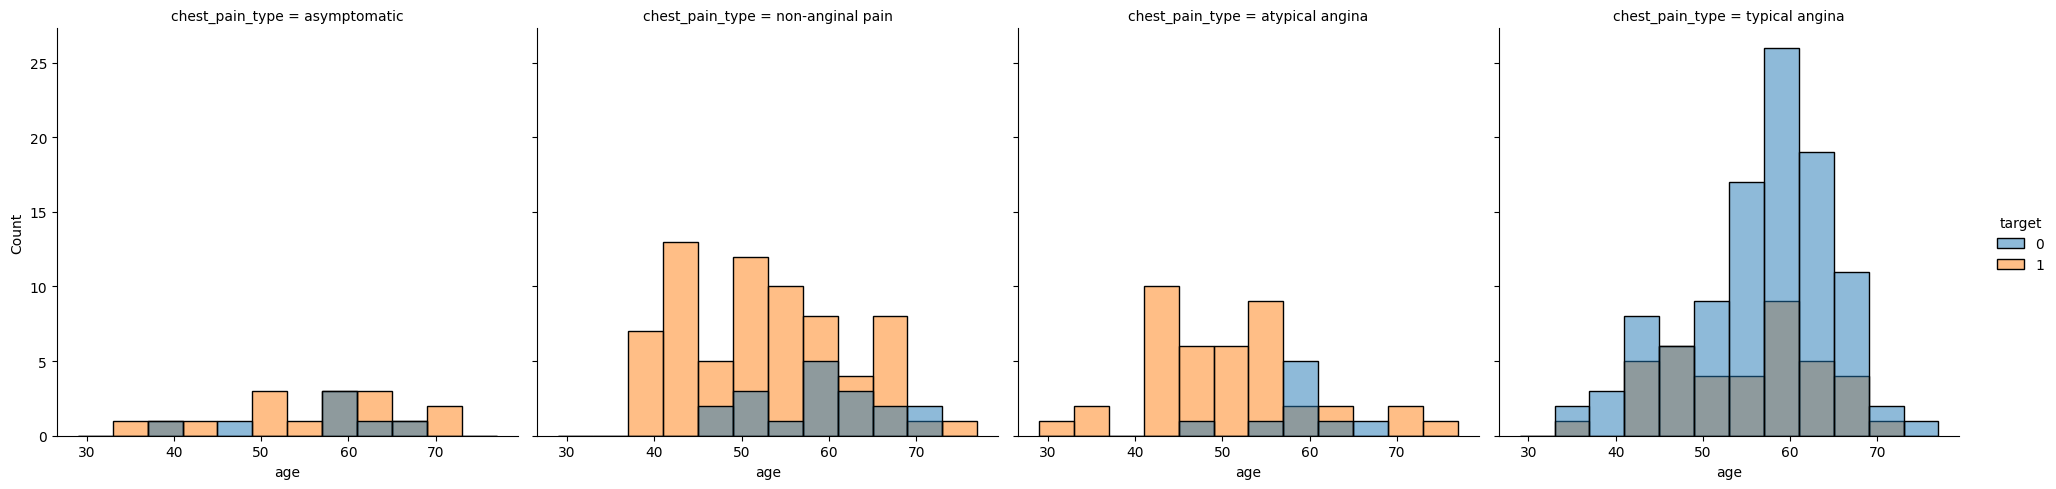

In [ ]:
sns.displot(data=df, x='age', col='chest_pain_type', hue='target')

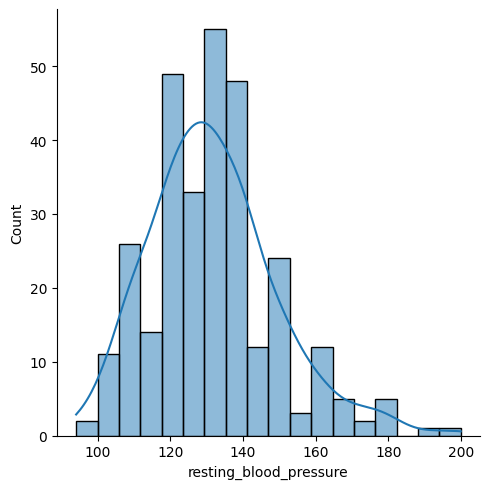

In [ ]:
sns.displot(df['resting_blood_pressure'], kde=True)

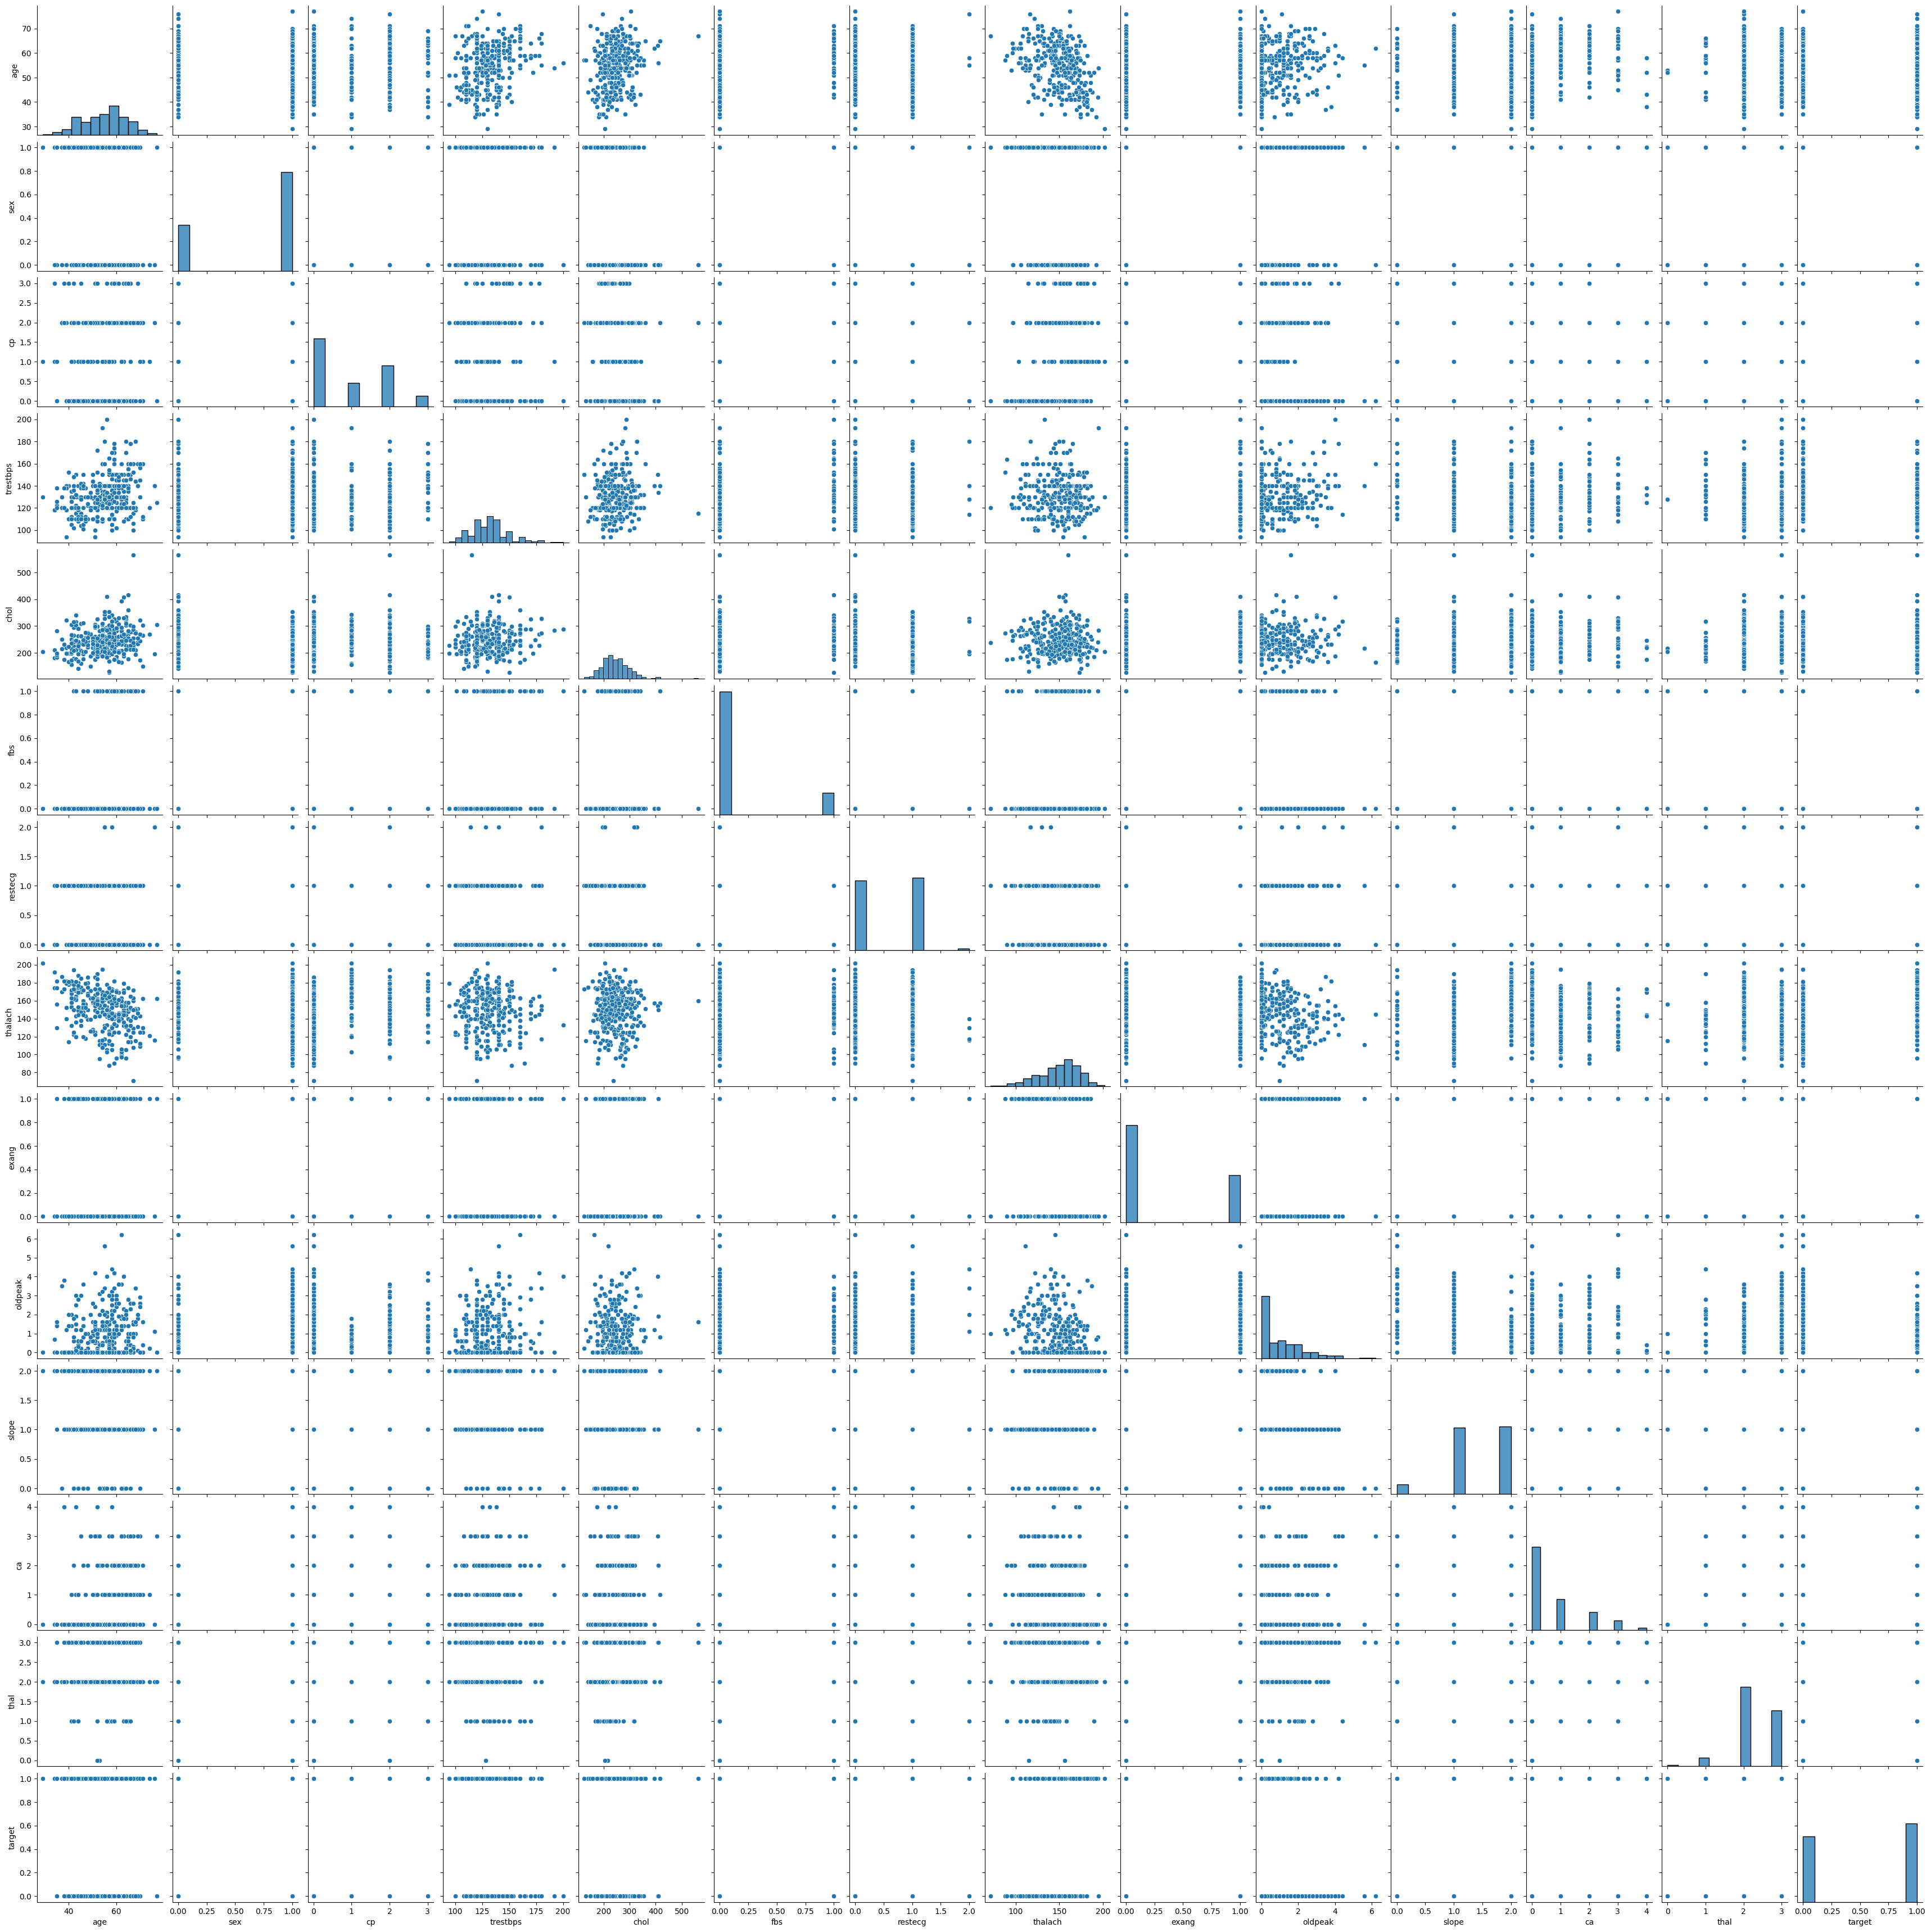

In [ ]:
sns.pairplot(df)

In [ ]:
X = df.drop('target',1)
y = df['target']
print('shape of X and y respectively :', X.shape, y.shape)

shape of X and y respectively : (303, 13) (303,)


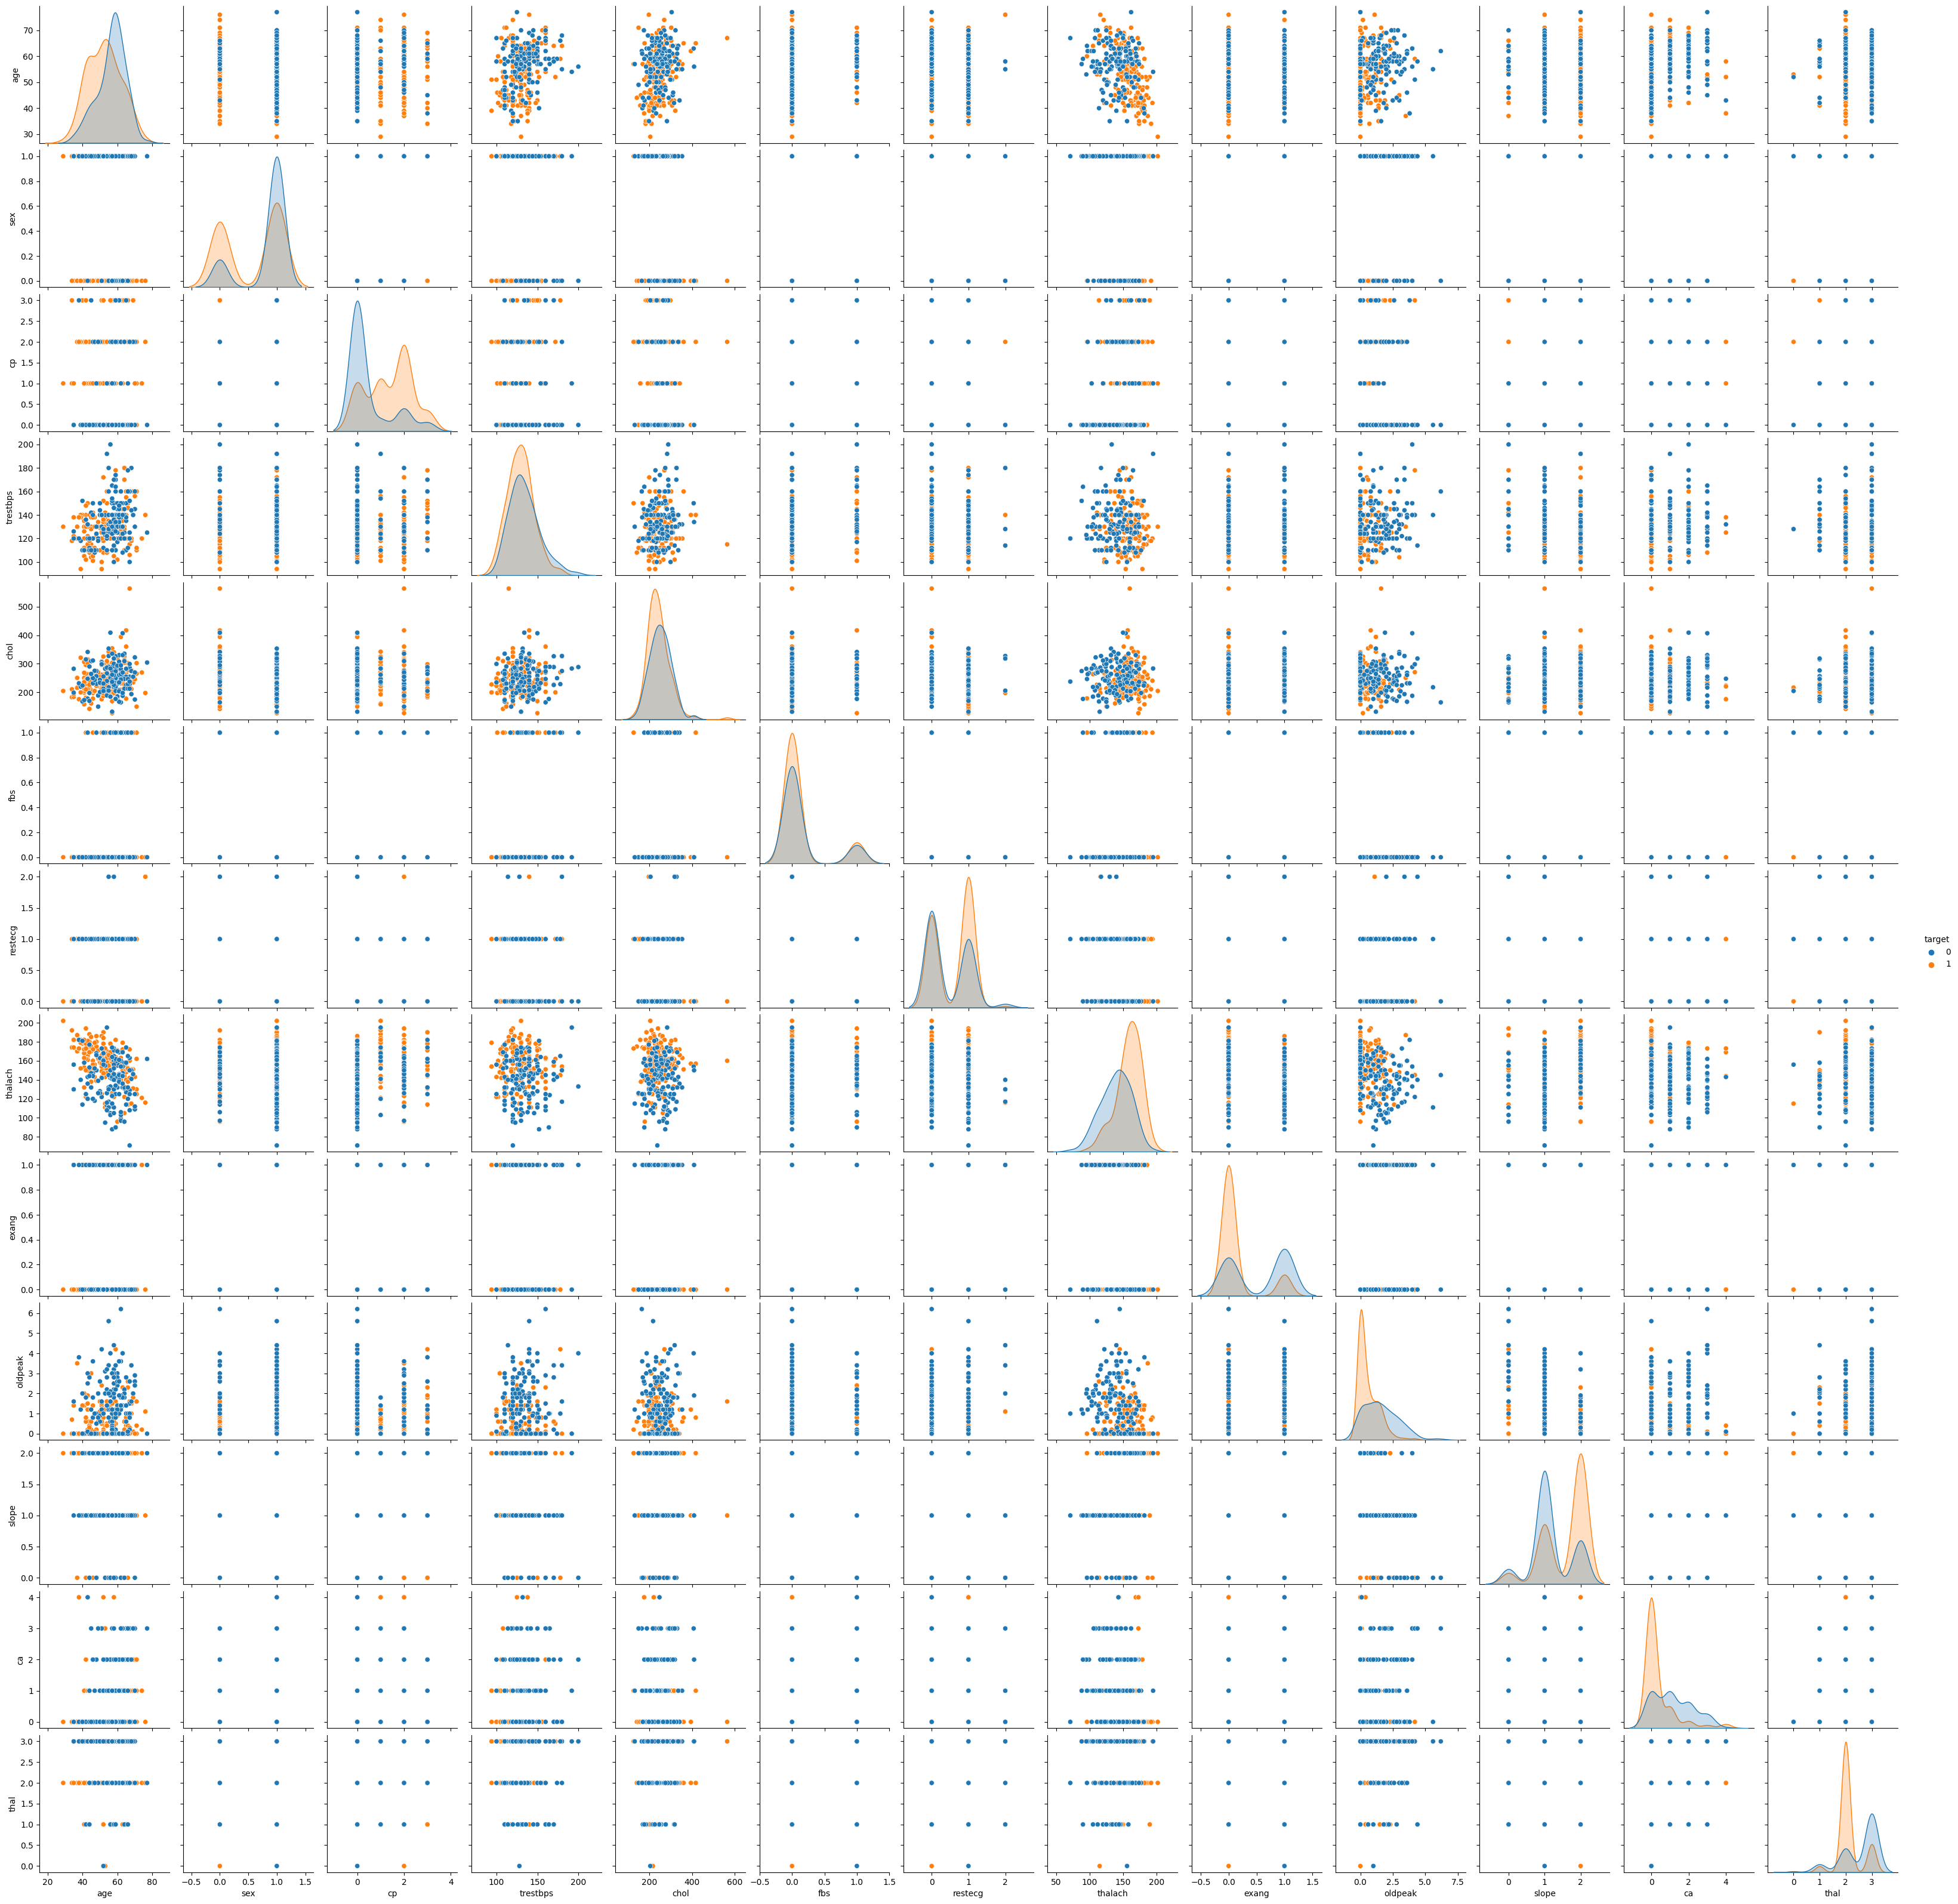

In [ ]:
sns.pairplot(df, hue='target')


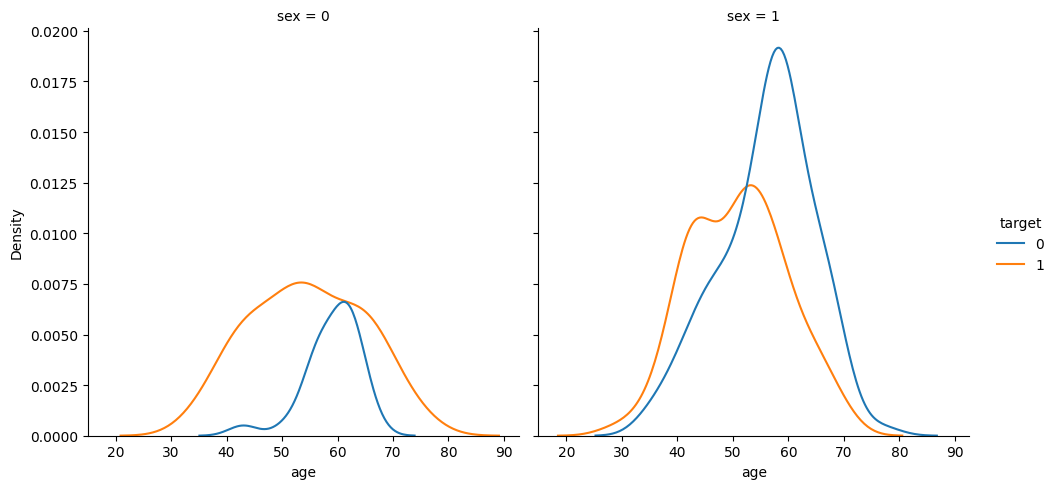

In [ ]:
sns.displot(data=df, x='age', col='sex', hue='target', kind='kde')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('shape of X and y respectively (train) :', X_train.shape, y_train.shape)
print('shape of X and y respectively (test) :', X_test.shape, y_test.shape)

shape of X and y respectively (train) : (242, 13) (242,)
shape of X and y respectively (test) : (61, 13) (61,)


# Logistic Regression

In [ ]:
print('Logistic Regression')
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_logreg = score
out_logreg = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

Logistic Regression
Training Score: 0.8388429752066116
Testing Score: 0.8524590163934426
   Predicted
0          0
1          1
2          1
3          0
4          0
% of people predicted with heart-disease: 0.6065573770491803
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



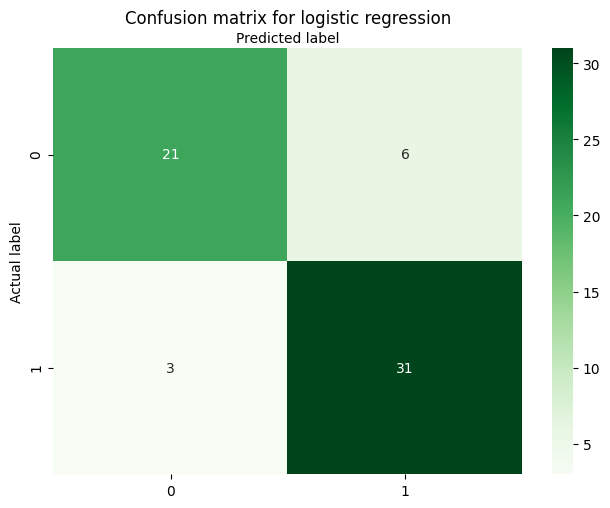

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for logistic regression')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

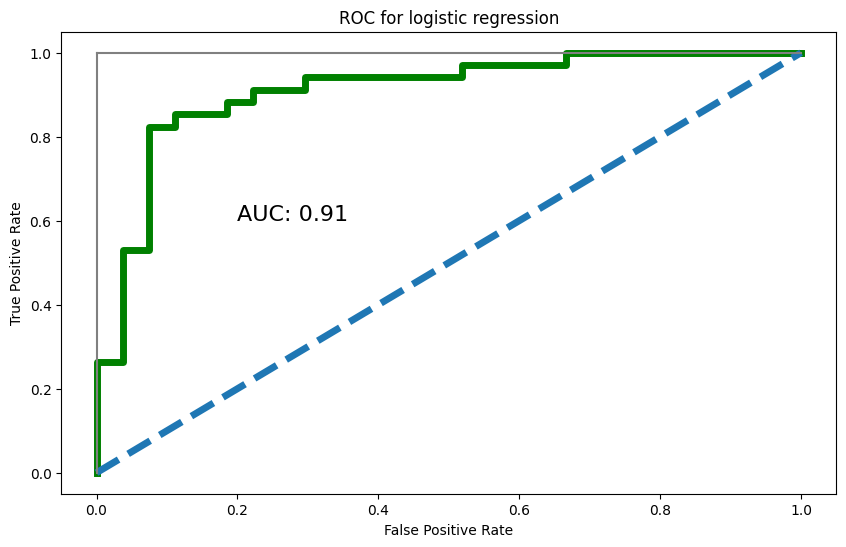

In [ ]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate_knn, true_positive_rate_knn, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for logistic regression')
plt.plot(false_positive_rate_knn, true_positive_rate_knn, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Decision Tree Classifier

In [ ]:
print('DecisionTreeClassifier')
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=5) 
decision_tree.fit(X_train, y_train)  
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_dtc = score
out_dtc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

DecisionTreeClassifier
Training Score: 0.8388429752066116
Testing Score: 0.8524590163934426
   Predicted
0          0
1          1
2          1
3          0
4          0
% of people predicted with heart-disease: 0.6065573770491803
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



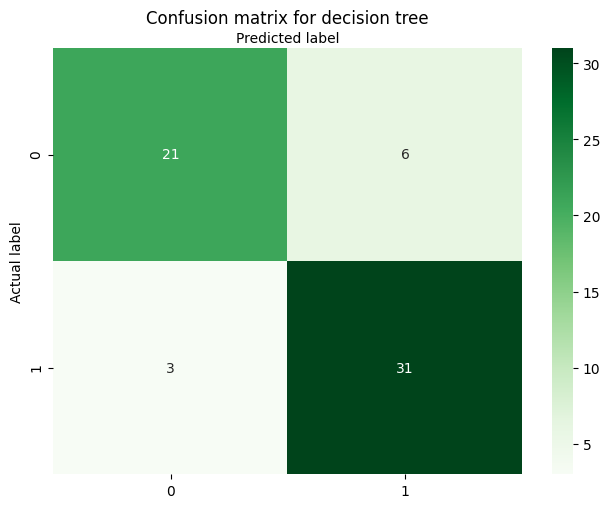

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for decision tree')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

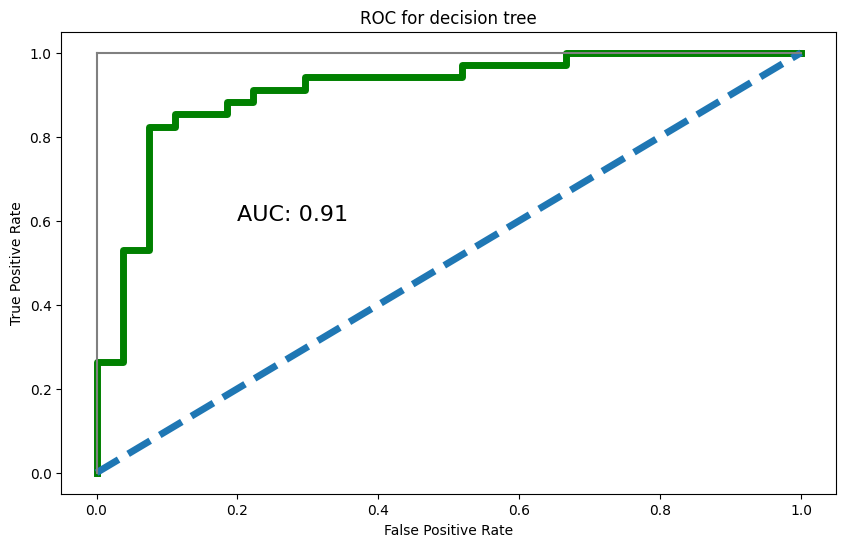

In [ ]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Random Forest Classifier

In [ ]:
print('RandomForestClassifier')
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_rfc = score
out_rfc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

RandomForestClassifier
Training Score: 1.0
Testing Score: 0.8524590163934426
   Predicted
0          0
1          1
2          1
3          0
4          0
% of people predicted with heart-disease: 0.5737704918032787
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



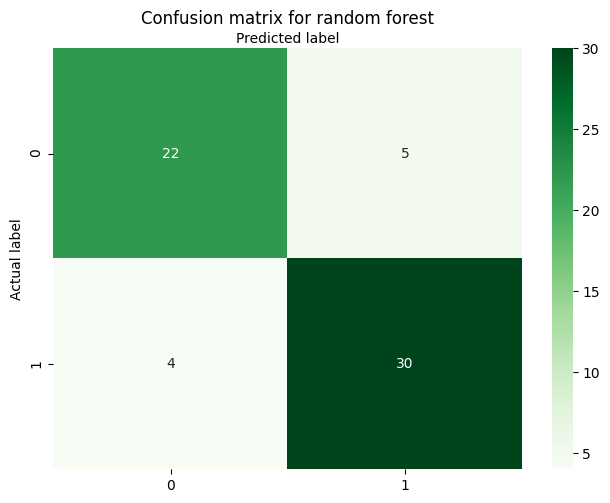

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for random forest')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

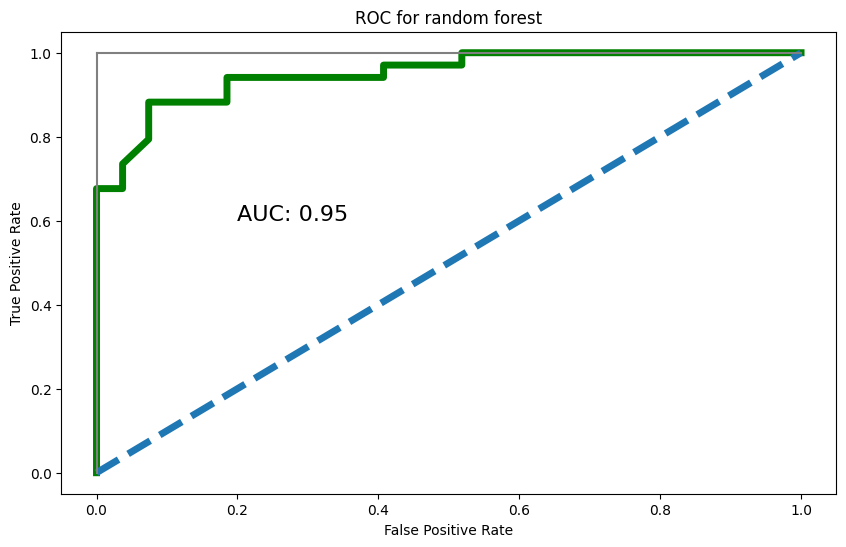

In [ ]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for random forest')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# KNeighborsClassifier

In [ ]:
print('KNeighborsClassifier')
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score_logreg)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_knc = score
out_knc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

KNeighborsClassifier
Training Score: 0.8524590163934426
Testing Score: 0.639344262295082
   Predicted
0          0
1          0
2          1
3          0
4          1
% of people predicted with heart-disease: 0.5245901639344263
              precision    recall  f1-score   support

           0       0.59      0.63      0.61        27
           1       0.69      0.65      0.67        34

    accuracy                           0.64        61
   macro avg       0.64      0.64      0.64        61
weighted avg       0.64      0.64      0.64        61



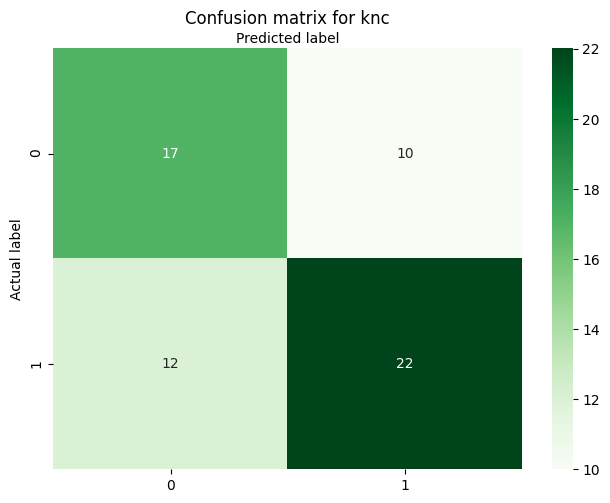

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for knc')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

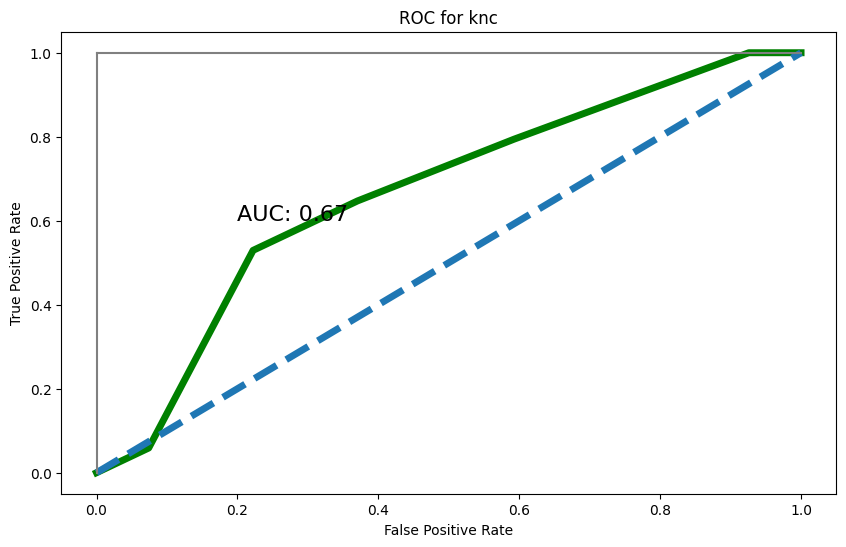

In [ ]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for knc')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Conclusion

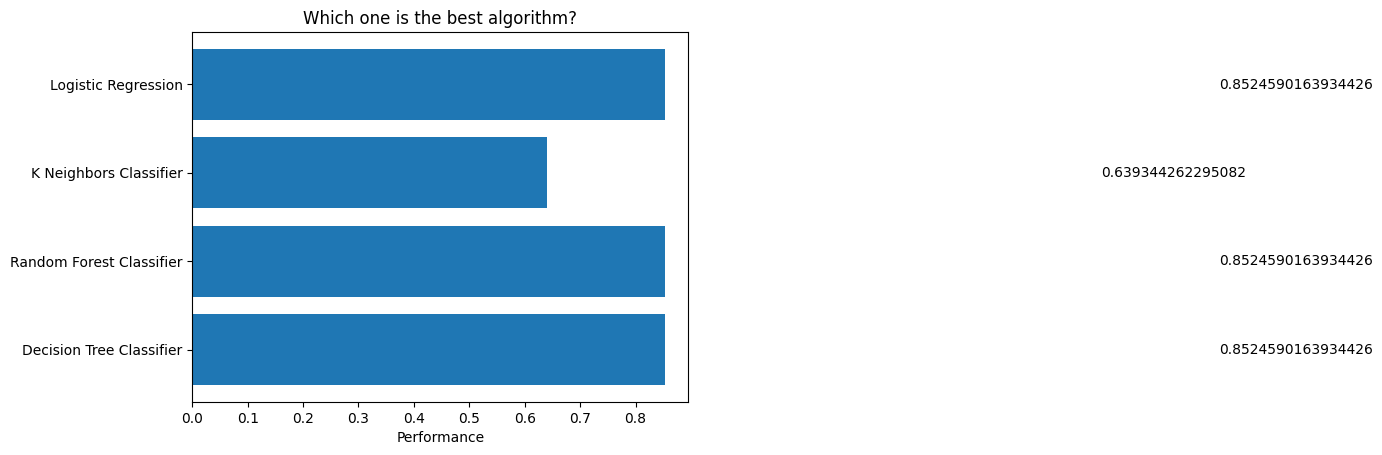

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots()
algorithms = ('Logistic Regression', 'K Neighbors Classifier', 'Random Forest Classifier', 'Decision Tree Classifier')
y_pos = np.arange(len(algorithms))
x = (score_logreg, score_knc, score_rfc, score_dtc) # scores
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(algorithms)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Which one is the best algorithm?')
for i, v in enumerate(x):
    ax.text(v + 1, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

In [ ]:
score = score_logreg
output = out_logreg
print("Logistic Regression!", score)
if score_dtc > score:
    score = score_dtc
    output = out_dtc
    print("Decision Tree Classifier!", score)
if score_rfc > score:
    score = score_rfc
    output = out_rfc
    print("Random Forest Classifier!", score)
if score_knc > score:
    score = score_knc
    output = out_knc
    print("K Neighbors Classifier!", score)

Logistic Regression! 0.8524590163934426


In [ ]:
output.to_csv('output.csv', index=False)
print("Success!")

Success!
